# Exploratory Analysis


In [0]:
#import appropriate libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [0]:
#combined training and testing sets to have entire dataset to ensure features are the
#same in both train and test sets
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'16N6CwZ16PBfQf1Jj2zEwSBq3bKpYi0gP'}) # replace the id with id of file you want to access
downloaded.GetContentFile('train.csv')
downloaded.GetContentFile('test.csv')


#3. Read file as panda dataframe
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]    

In [0]:
%matplotlib inline

plt.style.use('ggplot')

In [0]:
cols=['timedelta','n_tokens_title','n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity']
#create dataframe
mash=train_df
logdf=np.log(train_df[' shares']) #this could be the new target in training in model code, test would be the same

In [0]:
# X sets have only input variables, Y sets have only target variable of shares
X_train = train_df.drop(['url', ' shares'],axis=1) #X_train is the training data withour the 1st and 61st column
Y_train = train_df[' shares']                      #Y_train only contains our target variable
X_test = test_df.drop(['url', ' shares'],axis=1)   #X_test = "Original_data - X_train"
Y_test = test_df[' shares']                        #Y_test is used to verify the accuracy against what we predict later.

In [0]:
X_train = StandardScaler().fit_transform(X_train)

In [115]:
pd.DataFrame(data=X_train, columns=cols).head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,1.058154,-0.660465,0.203107,-0.044193,0.178471,0.217375,-0.166575,0.180560,-0.426648,-0.304323,...,-0.419711,-0.866584,0.177612,0.076155,0.420541,-0.187778,-0.665838,-0.142069,0.485025,-0.542099
1,1.431965,0.286940,3.272754,-1.110870,0.178471,-0.736425,1.240636,-0.078826,0.767059,-0.304323,...,0.057743,0.067796,0.981204,-0.123953,-0.955567,0.601631,-0.563068,-0.267627,0.308608,-0.689420
2,-1.128640,-0.186763,-0.017807,0.369217,0.178471,-0.141724,1.680389,-0.338211,-0.426648,-0.304323,...,0.803390,-0.866584,0.177612,-0.317887,-0.955567,0.601631,1.903396,1.615752,0.308608,1.520399
3,-1.156676,-0.186763,0.341967,0.006545,0.178471,-0.024353,0.888833,0.958716,-0.307277,-0.304323,...,-0.058846,-0.866584,0.177612,0.063404,0.076514,0.601631,-0.563068,0.485724,0.308608,0.194507
4,-0.904354,1.234345,0.520802,-0.407777,0.178471,-0.306323,0.097277,-0.856982,-0.426648,-0.304323,...,-0.749355,0.067796,-0.625980,0.505827,-0.267513,0.601631,0.361856,0.109049,-1.279148,-0.247456


In [0]:
pca =PCA(n_components=2)
princComp=pca.fit_transform(X_train)
princDF=pd.DataFrame(data=princComp, columns = ['princComp1','princComp2'])

In [117]:
princDF.head()

,princComp1,princComp2
0,-0.370717,-0.864871
1,-1.223913,0.259801
2,0.858770,3.832095
3,0.139321,0.217755
4,0.906667,0.738827


In [118]:
train_df[[' shares']].head()

,shares
0,821
1,784
2,1400
3,781
4,2400


In [119]:
new_DF=pd.concat([princDF,train_df[[' shares']]], axis=1)
new_DF.head()

,princComp1,princComp2,shares
0,-0.370717,-0.864871,821
1,-1.223913,0.259801,784
2,0.858770,3.832095,1400
3,0.139321,0.217755,781
4,0.906667,0.738827,2400


In [120]:
print(new_DF)

       princComp1  princComp2   shares
0       -0.370717   -0.864871      821
1       -1.223913    0.259801      784
2        0.858770    3.832095     1400
3        0.139321    0.217755      781
4        0.906667    0.738827     2400
5        0.049849    3.144029     2200
6        0.311118    1.066996      812
7        0.566212    0.479045      938
8       -2.045563    1.006251      906
9        0.475204    0.447522      776
10      -0.340529    3.219989     1100
11       0.683466    3.310695     1600
12      -0.845302   -0.633267     1400
13       0.344551    1.074103     1600
14      -0.104483    1.488613     1400
15      -0.649534   -2.467879     2100
16      -0.931171   -0.287439      220
17      -0.319569    0.176608     6600
18       1.194358    1.338478     2400
19      -0.886875    2.685328     1100
20      -1.191024    4.040186     1200
21       1.900323    2.866166     1400
22      -2.191495    1.528694      733
23      -0.509932    1.401478     1600
24       1.144891   -0.33

In [121]:
combine=[new_DF]

for dataset in combine:
    dataset.loc[ dataset[' shares'] <= 1400, ' shares'] = 0
    dataset.loc[ dataset[' shares'] > 1400, ' shares'] = 1
    
new_DF.tail()

,princComp1,princComp2,shares
31710,-0.607256,-0.130543,1
31711,-0.322010,6.041278,0
31712,13.453095,2.322208,1
31713,-0.046826,-0.831779,1
31714,-0.692564,-5.115981,1


In [122]:
print(new_DF)

       princComp1  princComp2   shares
0       -0.370717   -0.864871        0
1       -1.223913    0.259801        0
2        0.858770    3.832095        0
3        0.139321    0.217755        0
4        0.906667    0.738827        1
5        0.049849    3.144029        1
6        0.311118    1.066996        0
7        0.566212    0.479045        0
8       -2.045563    1.006251        0
9        0.475204    0.447522        0
10      -0.340529    3.219989        0
11       0.683466    3.310695        1
12      -0.845302   -0.633267        0
13       0.344551    1.074103        1
14      -0.104483    1.488613        0
15      -0.649534   -2.467879        1
16      -0.931171   -0.287439        0
17      -0.319569    0.176608        1
18       1.194358    1.338478        1
19      -0.886875    2.685328        0
20      -1.191024    4.040186        0
21       1.900323    2.866166        0
22      -2.191495    1.528694        0
23      -0.509932    1.401478        1
24       1.144891   -0.33

TypeError: ignored

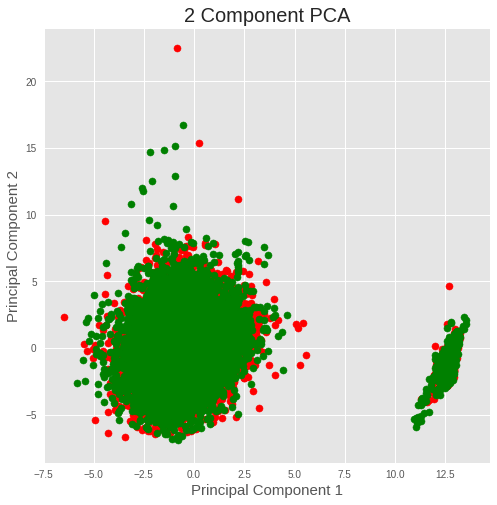

In [123]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


shares = [0,1]
colors = ['r', 'g' ]
for shares, color in zip(shares,colors):
    indicesToKeep = new_DF[' shares'] == shares
    ax.scatter(new_DF.loc[indicesToKeep, 'princComp1']
               , new_DF.loc[indicesToKeep, 'princComp2']
               , c = color
               , s = 50)
ax.legend(shares)
ax.grid()

Explain correlations here/play with features selected to make heatmap for readable..